### MLP Classifier and GridSearch Tutorials

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Reading Dataset
df =pd.read_csv("wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [4]:
X.shape

(178, 13)

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_Train , X_Test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=408,stratify=y)

In [7]:
#Defining Pipeline for the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline(
   steps= [
        ('scaler',StandardScaler()),
        ('mlp',MLPClassifier(max_iter=1500,random_state=408))
    ]
)

In [8]:
#Defining HyperParameter Grid
#Here the mlp used is the one which was defined above in the above pipeline
param_grid = {
    'mlp__hidden_layer_sizes':[(10,),(10,10),(5,10),(5,)],
    'mlp__activation':['relu','tanh'],
    'mlp__solver':['adam','sgd'],
    'mlp__learning_rate':['constant','adaptive'],
    'mlp__alpha':[0.0001,0.001],
}

In [9]:
##Defining Grid Search with CV
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(
    pipe,param_grid=param_grid,cv=10,scoring='accuracy',verbose=1
)

In [10]:
grid_search.fit(X_Train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=1500,
                                                      random_state=408))]),
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(10,), (10, 10), (5, 10),
                                                     (5,)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [11]:
##Now applying estimators
estimators = grid_search.cv_results_['params']
estimators_df = pd.DataFrame(estimators)
estimators_df

,mlp__activation,mlp__alpha,mlp__hidden_layer_sizes,mlp__learning_rate,mlp__solver
0,relu,0.0001,"(10,)",constant,adam
1,relu,0.0001,"(10,)",constant,sgd
2,relu,0.0001,"(10,)",adaptive,adam
3,relu,0.0001,"(10,)",adaptive,sgd
4,relu,0.0001,"(10, 10)",constant,adam
...,...,...,...,...,...
59,tanh,0.0010,"(5, 10)",adaptive,sgd
60,tanh,0.0010,"(5,)",constant,adam
61,tanh,0.0010,"(5,)",constant,sgd
62,tanh,0.0010,"(5,)",adaptive,adam


In [12]:
all_estimators = grid_search.cv_results_
all_estimators= pd.DataFrame(all_estimators)
all_estimators

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__solver,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.463950,0.066165,0.001495,0.002438,relu,0.0001,"(10,)",constant,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,0.928571,1.0,0.857143,0.928571,0.964286,0.047916,33
1,0.680832,0.113056,0.005091,0.003763,relu,0.0001,"(10,)",constant,sgd,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,1.000000,1.0,0.928571,0.928571,1.0,0.857143,0.928571,0.964286,0.047916,33
2,0.513723,0.064991,0.003054,0.002561,relu,0.0001,"(10,)",adaptive,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,0.928571,1.0,0.857143,0.928571,0.964286,0.047916,33
3,0.881102,0.165676,0.005142,0.003719,relu,0.0001,"(10,)",adaptive,sgd,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,1.000000,1.0,0.928571,0.928571,1.0,0.857143,0.928571,0.964286,0.047916,33
4,0.504391,0.084193,0.003543,0.004296,relu,0.0001,"(10, 10)",constant,adam,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,1.000000,1.0,0.857143,0.857143,0.964286,0.057588,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.461687,0.021703,0.001574,0.004721,tanh,0.001,"(5, 10)",adaptive,sgd,"{'mlp__activation': 'tanh', 'mlp__alpha': 0.00...",...,0.857143,1.0,1.000000,1.000000,1.0,1.000000,0.928571,0.978571,0.045737,21
60,0.408458,0.024848,0.001405,0.003890,tanh,0.001,"(5,)",constant,adam,"{'mlp__activation': 'tanh', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,1.000000,1.0,0.857143,0.857143,0.957143,0.057143,57
61,0.380757,0.015617,0.004445,0.006873,tanh,0.001,"(5,)",constant,sgd,"{'mlp__activation': 'tanh', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,1.000000,1.0,0.928571,1.000000,0.985714,0.028571,1
62,0.406175,0.026311,0.002009,0.005079,tanh,0.001,"(5,)",adaptive,adam,"{'mlp__activation': 'tanh', 'mlp__alpha': 0.00...",...,0.928571,1.0,1.000000,1.000000,1.0,0.857143,0.857143,0.957143,0.057143,57


In [13]:
##Obtaining Best Model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(5,), max_iter=1500,
                               random_state=408, solver='sgd'))])

In [14]:
y_predict = best_model.predict(X_Test)


In [15]:
y_predict

array([3, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 2, 3, 3, 3, 1, 1, 2, 3,
       2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 1], dtype=int64)

In [16]:
grid_search.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__hidden_layer_sizes': (5,),
 'mlp__learning_rate': 'constant',
 'mlp__solver': 'sgd'}

In [17]:
#Plotting ROC Curve and getting the metrics
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve,precision_score)
precision = precision_score(y_test,y_pred=y_predict,average='macro')
recall = recall_score(y_test,y_predict,average='macro')
f1 = f1_score(y_test,y_predict,average='macro')
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_predict)}")

Precision : 1.0
Recall : 1.0
F1 Score : 1.0
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test,classes=np.unique(y))
y_scores =best_model.predict_proba(X=X_Test)

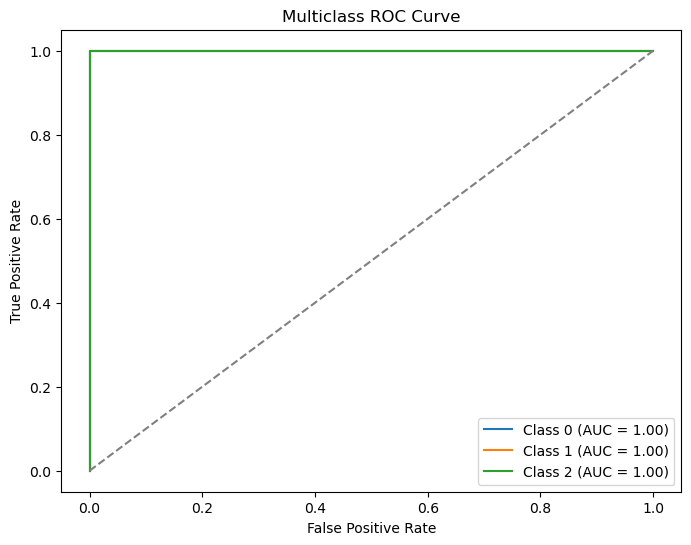

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_scores[:,i])
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f"Class {i} (AUC = {roc_auc:.2f})")
#Plotting diagonal line (random classifer)
plt.plot([0,1],[0,1],color="gray",linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")    

In [22]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predict))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
